In [1]:
# setup
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa.feature import melspectrogram

# TODO: change the file path
FILE_DIR = "./nsynth-subtrain/audio"
LABEL_PATH = "./nsynth-subtrain/examples.json"
RANDOM_SEED = 0


In [2]:
# load file
df = pd.read_json(LABEL_PATH, orient='index')
print(df.columns)
df.head()

Index(['note', 'sample_rate', 'pitch', 'instrument_source',
       'instrument_family_str', 'instrument_str', 'note_str', 'qualities_str',
       'instrument_source_str', 'velocity', 'instrument_family', 'instrument',
       'qualities'],
      dtype='object')


,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
bass_synthetic_022-108-127,89262,16000,108,2,bass,bass_synthetic_022,bass_synthetic_022-108-127,"[bright, distortion]",synthetic,127,0,321,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
bass_synthetic_050-108-075,272731,16000,108,2,bass,bass_synthetic_050,bass_synthetic_050-108-075,"[distortion, nonlinear_env]",synthetic,75,0,540,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0]"
bass_synthetic_057-108-100,284902,16000,108,2,bass,bass_synthetic_057,bass_synthetic_057-108-100,"[distortion, nonlinear_env]",synthetic,100,0,583,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0]"
bass_synthetic_017-108-050,37332,16000,108,2,bass,bass_synthetic_017,bass_synthetic_017-108-050,[long_release],synthetic,50,0,249,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
bass_synthetic_131-108-100,225176,16000,108,2,bass,bass_synthetic_131,bass_synthetic_131-108-100,"[bright, distortion]",synthetic,100,0,909,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


## Task1: Visualize a Mel-Spectrogram

- references: 
    -  [librosa.load](https://librosa.org/doc/main/generated/librosa.load.html)
    -  [librosa.feature.melspectrogram](https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html)


In [3]:
# randomly choose 3 pitches and instruments
print("Sample files to visualize")
print("-----"*5)
random.seed(RANDOM_SEED)
instruments = sorted(random.sample(df["instrument_family_str"].unique().tolist(), 3))
pitches = sorted(random.sample(df["pitch"].unique().tolist(), 3))
print(f"3 different instruments: {instruments}")
print(f"3 different pitches: {pitches}")
print("-----"*5)

sampled_audios = []
for inst in instruments:
    for pit in pitches:
        sampled_audios.append(
            df.loc[
                (df["instrument_family_str"] == inst) & 
                (df["pitch"] == pit), :
            ].index[0]
        )

print(f"audio file names: {sampled_audios}")

Sample files to visualize
-------------------------
3 different instruments: ['bass', 'organ', 'vocal']
3 different pitches: [25, 29, 66]
-------------------------
audio file names: ['bass_electronic_013-025-025', 'bass_synthetic_121-029-025', 'bass_synthetic_099-066-100', 'organ_electronic_075-025-025', 'organ_electronic_054-029-050', 'organ_electronic_013-066-100', 'vocal_synthetic_001-025-127', 'vocal_synthetic_000-029-100', 'vocal_synthetic_010-066-050']


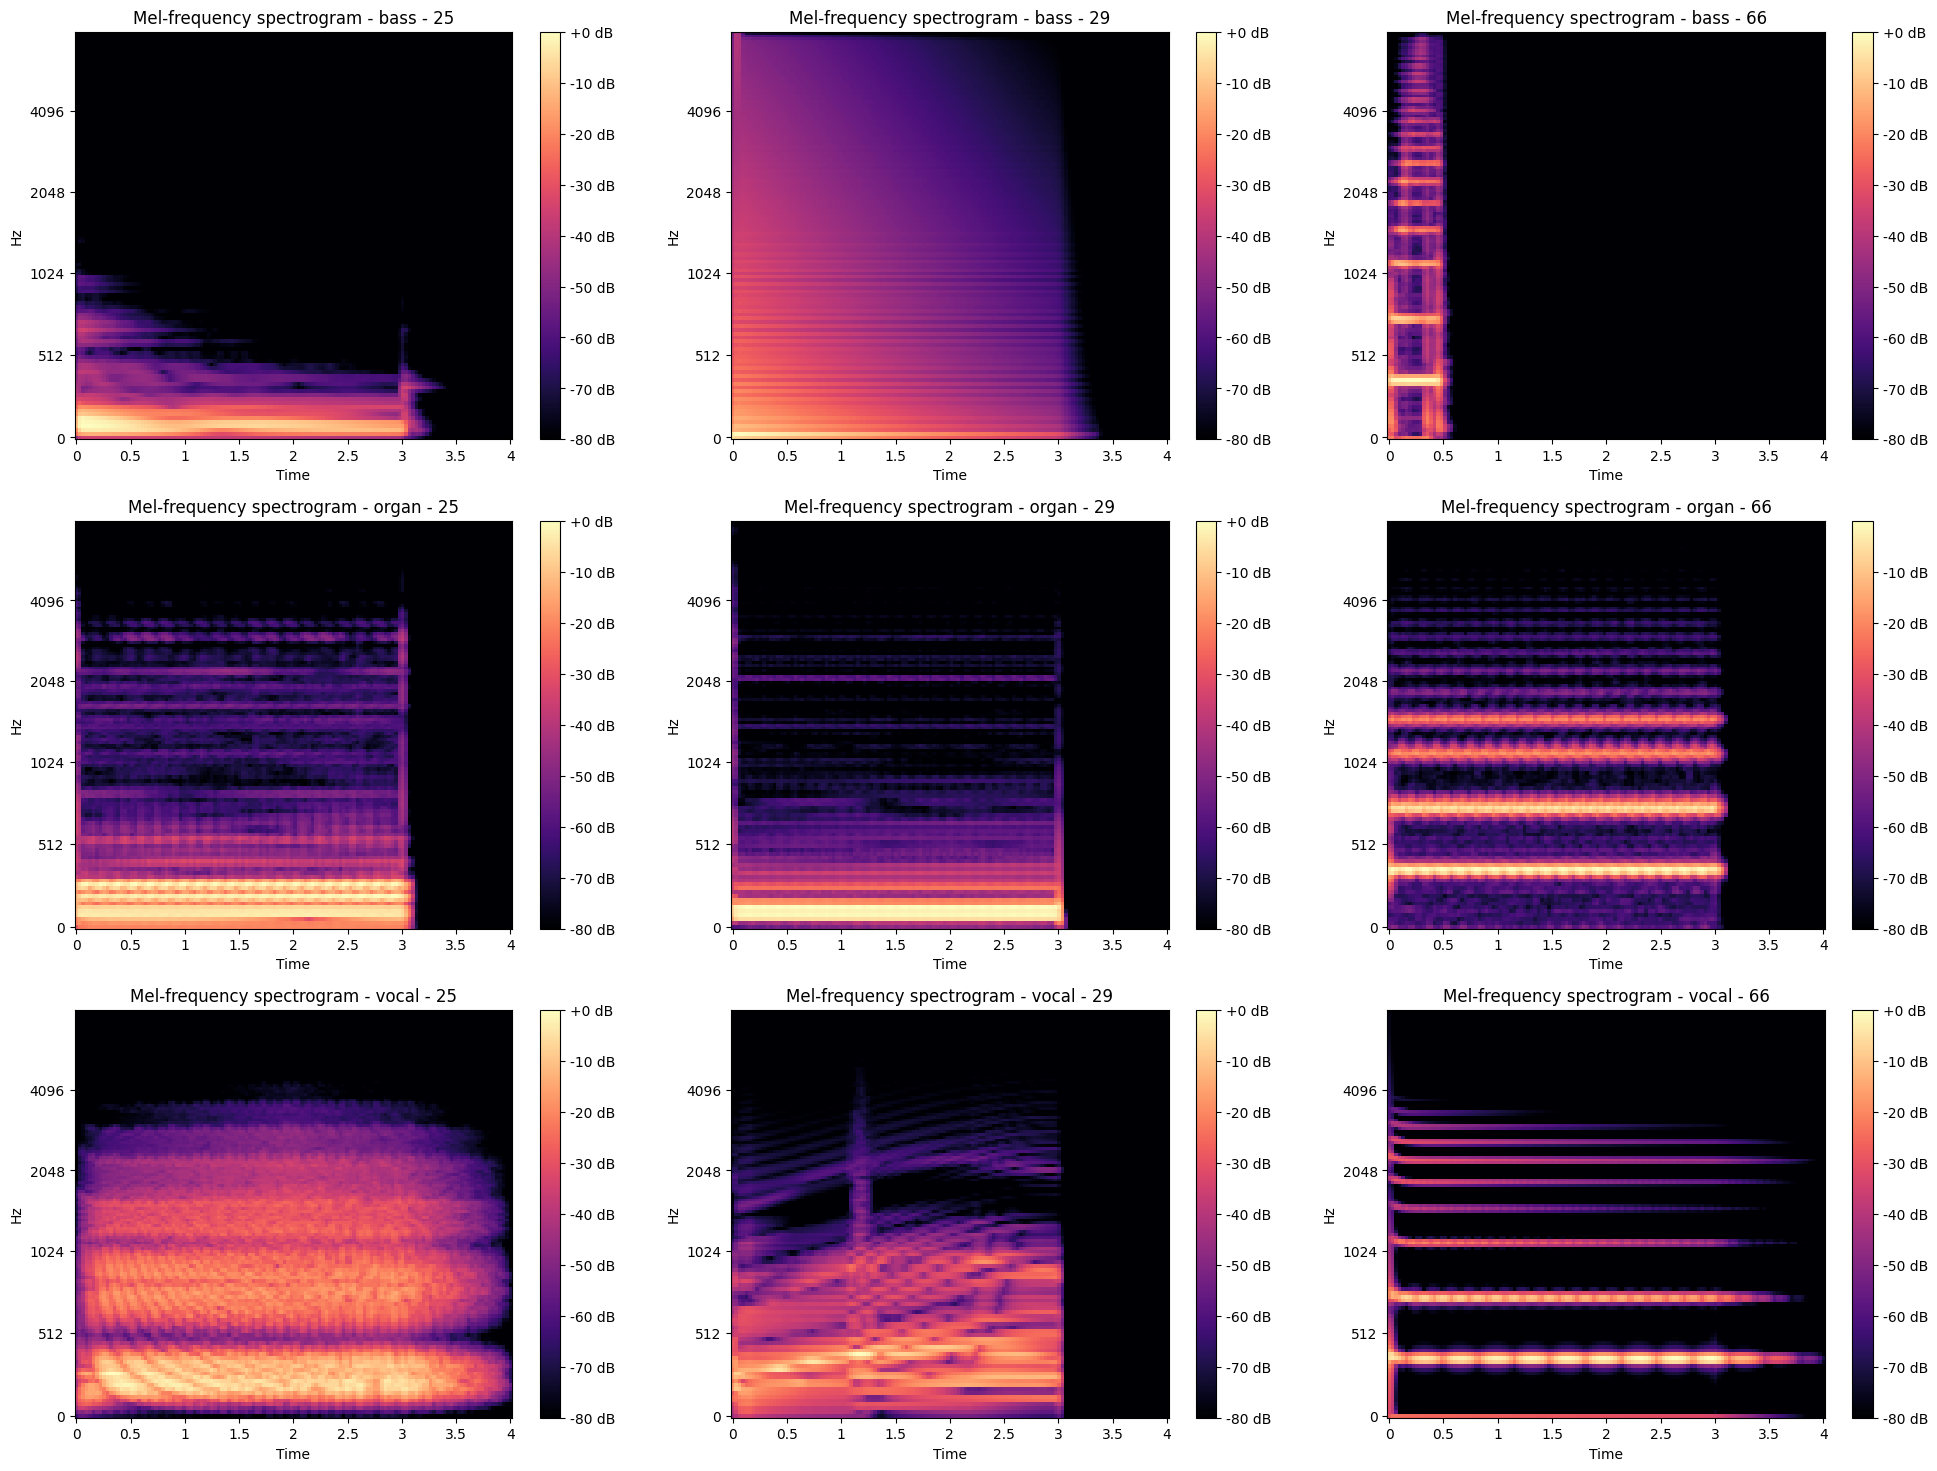

In [4]:
# visualize
fig, axes = plt.subplots(3, 3, figsize=(24, 18))
axes = axes.flatten()
for i in range(len(sampled_audios)):
    filepath = f"{FILE_DIR}/{sampled_audios[i]}.wav"
    instrument = instruments[i//3]
    pitch = str(pitches[i%3])
    y, sr = librosa.load(filepath, sr=16000)
    S = melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=sr,
                            fmax=8000, ax=axes[i])

    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')
    axes[i].set_title(f"Mel-frequency spectrogram - {instrument} - {pitch}")